In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df = df[df['area'] > 0]

In [6]:
df['price_per_sqft'] = df['price'] / df['area']

df['net_size'] = df['area'] * df['stories']

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_per_sqft',
       'net_size'],
      dtype='object')

In [8]:
print(df.shape)
print(df.size)

(545, 15)
8175


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price_per_sqft      0
net_size            0
dtype: int64

In [10]:
binary_features = ['mainroad','guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea']
for col in binary_features:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [11]:
furnishing_order = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_order)

In [12]:
x = df.drop('price', axis = 1)
y = df['price']

In [13]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,net_size
0,7420,4,2,3,1,0,0,0,1,2,1,2,1792.452830,22260
1,8960,4,4,4,1,0,0,0,1,3,0,2,1367.187500,35840
2,9960,3,2,2,1,0,1,0,0,2,1,1,1229.919679,19920
3,7500,4,2,2,1,0,1,0,1,3,1,2,1628.666667,15000
4,7420,4,1,2,1,1,1,0,1,2,0,2,1537.735849,14840


In [14]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [15]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [16]:
lrModel = LinearRegression()
lr = lrModel.fit(x_train, y_train)
lr_pred = lrModel.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear regression:")
print("mse:", lr_mse)
print("r2:", lr_r2)
print(lr.score(x_train, y_train))

Linear regression:
mse: 511145866679.88257
r2: 0.8988745151879121
0.8592888845732518


In [17]:
dtModel = DecisionTreeRegressor(max_depth=10, random_state=42)
dtModel.fit(x_train, y_train)
dt_pred = dtModel.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree:")
print("mse:", dt_mse)
print("r2:", dt_r2)

Decision Tree:
mse: 367007559885.6042
r2: 0.9273909468070167


In [50]:
rfModel = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rfModel.fit(x_train, y_train)
rf_pred = rfModel.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random forest:")
print("mse:", rf_mse)
print("r2:", rf_r2)

Random forest:
mse: 361347318168.2421
r2: 0.9285107733088719


In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), x, y, cv=5, scoring='r2')
print(scores.mean())

-1.2298035668530376


In [20]:
mse_val = [lr_mse, dt_mse, rf_mse]
r2_val = [lr_r2, dt_r2, rf_r2]
models = ["Linear regression", "Decision Tree", "Random forest"]

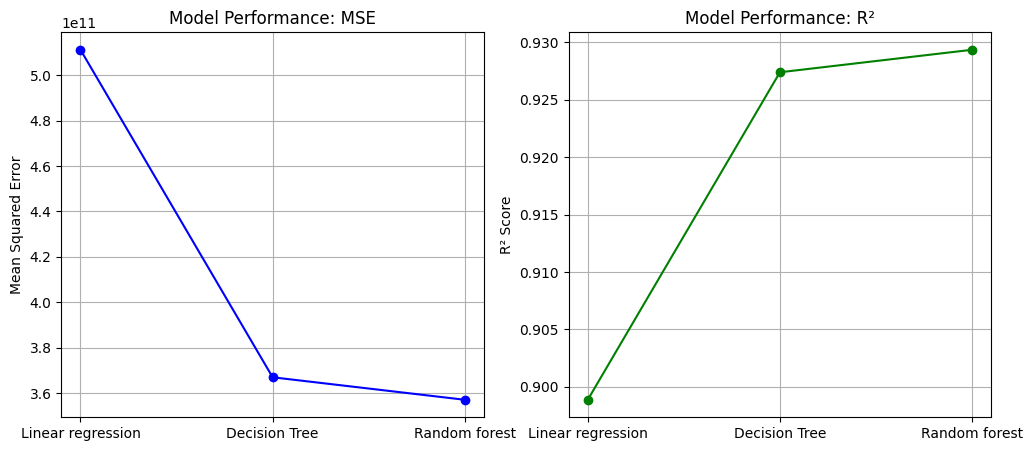

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(models, mse_val, marker='o', linestyle='-', label='MSE', color='blue')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance: MSE')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(models, r2_val, marker='o', linestyle='-', label='R²', color='green')
plt.ylabel('R² Score')
plt.title('Model Performance: R²')
plt.grid(True)
plt.show()

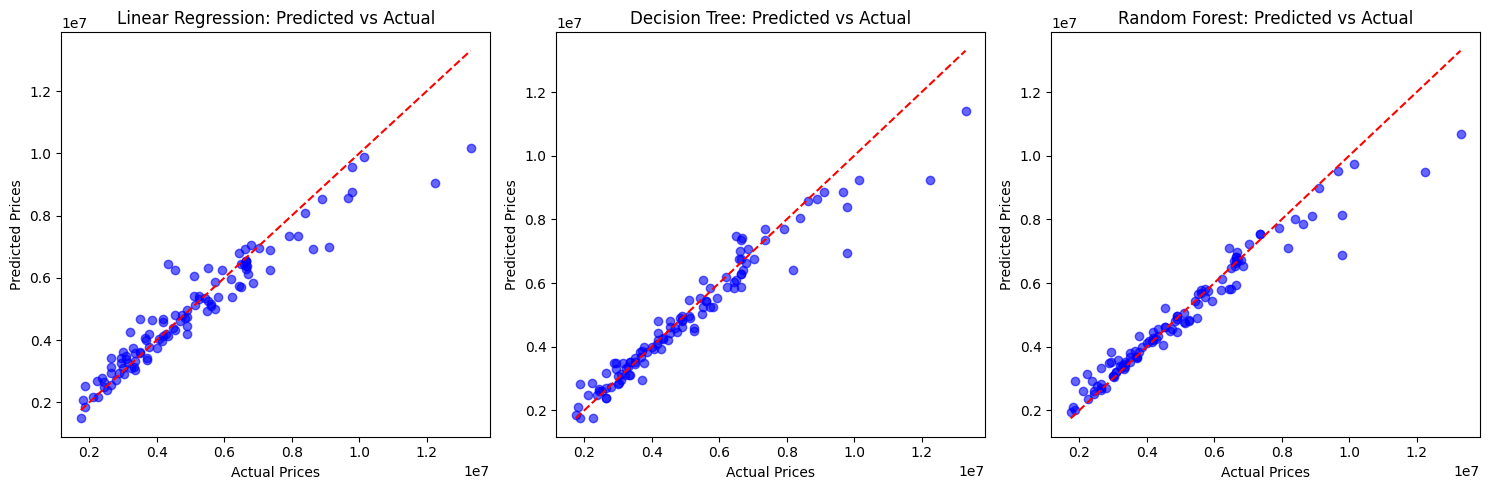

In [22]:
models_predictions = {
    'Linear Regression': lr_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred
}

plt.figure(figsize=(15, 5))

for i, (name, pred) in enumerate(models_predictions.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name}: Predicted vs Actual')
    plt.tight_layout()

plt.show()

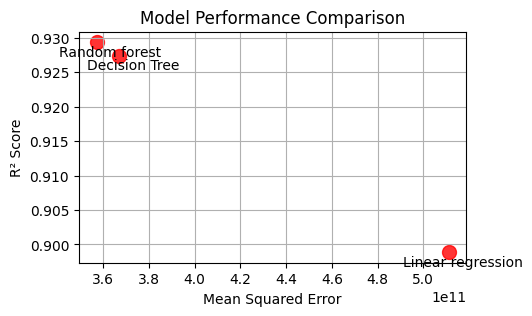

In [23]:
plt.figure(figsize=(5, 3))
plt.scatter(mse_val, r2_val, color='red', s=100, alpha=0.8)

for i, model in enumerate(models):
    plt.annotate(model, (mse_val[i], r2_val[i]), textcoords="offset points", xytext=(10, -10), ha='center')

plt.xlabel('Mean Squared Error')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()


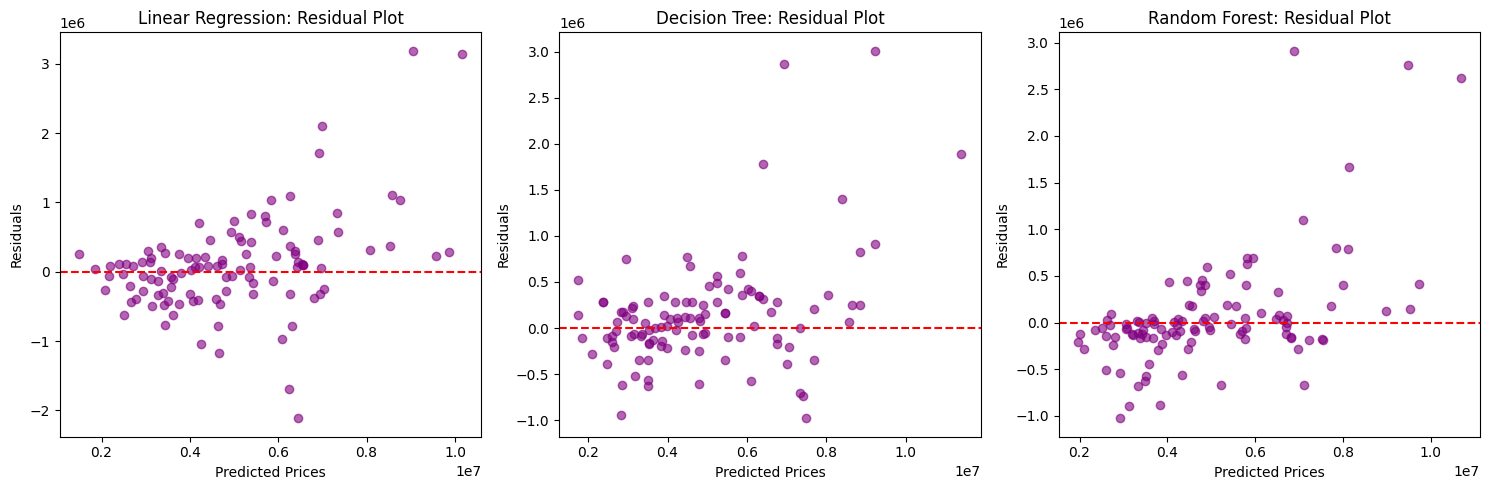

In [24]:
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(15, 5))

for i, (model_name, predictions) in enumerate(models_predictions.items(), 1):
    residuals = y_test - predictions
    plt.subplot(1, 3, i)
    plt.scatter(predictions, residuals, alpha=0.6, color='purple')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Prices')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residual Plot')
    plt.tight_layout()

plt.show()

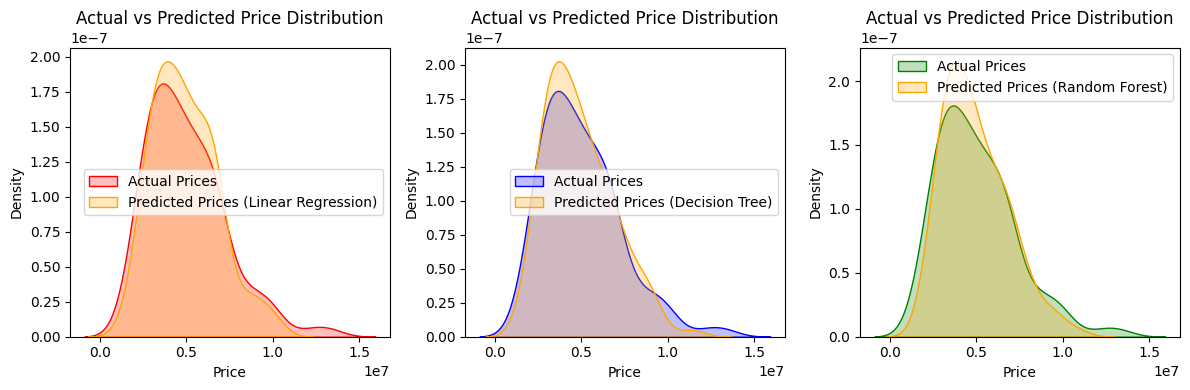

In [102]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.kdeplot(y_test, label='Actual Prices', color='red', fill=True)
sns.kdeplot(lr_pred, label='Predicted Prices (Linear Regression)', color='orange', fill=True)
plt.title('Actual vs Predicted Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,3,2)
sns.kdeplot(y_test, label='Actual Prices', color='blue', fill=True)
sns.kdeplot(dt_pred, label='Predicted Prices (Decision Tree)', color='orange', fill=True)
plt.title('Actual vs Predicted Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,3,3)
sns.kdeplot(y_test, label='Actual Prices', color='green', fill=True)
sns.kdeplot(rf_pred, label='Predicted Prices (Random Forest)', color='orange', fill=True)
plt.title('Actual vs Predicted Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

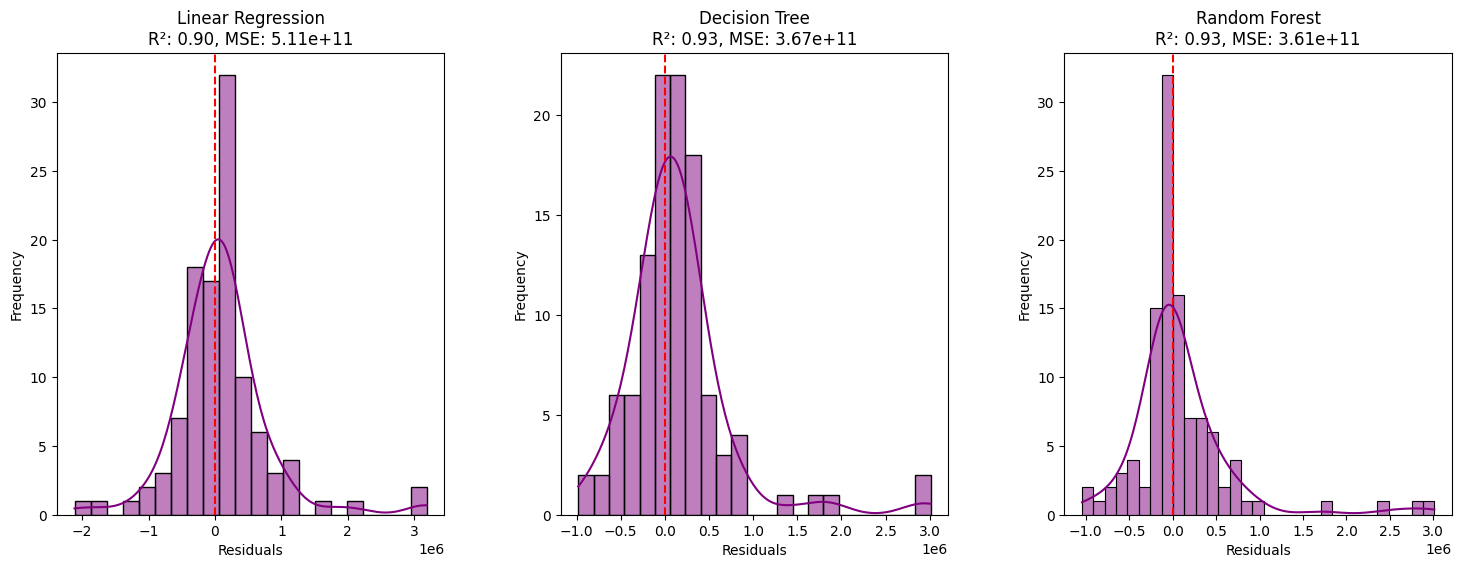

In [100]:
models = {
    "Linear Regression": lr_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred
}

fig, axes = plt.subplots(1, len(models), figsize=(18, 6), gridspec_kw={'wspace': 0.3})

for idx, (model_name, predictions) in enumerate(models.items()):
    residuals = y_test - predictions
    r2_val = r2_score(y_test, predictions)
    mse_val = mean_squared_error(y_test, predictions)
    
    sns.histplot(residuals, kde=True, ax=axes[idx], color='purple')
    axes[idx].axvline(x=0, color='red', linestyle='--')
    axes[idx].set_title(f'{model_name}\nR²: {r2_val:.2f}, MSE: {mse_val:.2e}')
    axes[idx].set_xlabel('Residuals')
    axes[idx].set_ylabel('Frequency')

plt.show()
